### This notebook calculates parameters for ALMA input and interpret result from ALMA output
This notebook has to be run with Python 3.8.10 kernel

In [1]:
# Anyways I can do some caluclations of parameters first or set up a basic script

# Required Resolution
# prob about 0.1 arcsec and maybe smaller
#To calculate

In [2]:
# import casatasks
#https://github.com/aardk/jupyter-casa/blob/master/examples/vla-cont-tutorial.ipynb
#https://colab.research.google.com/github/casangi/examples/blob/master/community/casa6_demo.ipynb#scrollTo=IIr5sp0VgR2m

### There is a sensitivity calculator already

https://almascience.nrao.edu/proposing/sensitivity-calculator


Common Parameters:


Declination:  14h08m10s

Polarisation:  Dual



In [12]:
!pip install jinja2

DEPRECATION: Loading egg at c:\users\lhem\appdata\local\programs\python\python312\lib\site-packages\radmc3dpy-2.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install tabulate

DEPRECATION: Loading egg at c:\users\lhem\appdata\local\programs\python\python312\lib\site-packages\radmc3dpy-2.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
# Snippet to output table

import pandas as pd
import numpy as np

# Example arrays
array1 = np.random.random(10)
array2 = np.random.random(10)
array3 = np.random.random(10)

# Create a DataFrame from the arrays
df = pd.DataFrame({
    'Column 1': array1,
    'Column 2': array2,
    'Column 3': array3
})

# Display the DataFrame as a table
print(df)

   Column 1  Column 2  Column 3
0  0.355783  0.854914  0.290049
1  0.695603  0.669189  0.728948
2  0.540359  0.786975  0.928111
3  0.787424  0.884627  0.211422
4  0.837876  0.092430  0.200458
5  0.596453  0.973563  0.788637
6  0.014318  0.350737  0.828953
7  0.924630  0.280569  0.995238
8  0.327475  0.121961  0.634876
9  0.390151  0.213482  0.420222


### Spatial Resolution Formula in Arcseconds

The resolution in arcseconds can be approximated as:

$$
\text{FWHM} (") = \frac{76}{\text{max\_baseline (km)} \times \text{frequency (GHz)}}
$$


### Maximum Recoverable Scale (MRS):

$$
\text{MRS} \approx 0.6 \times \frac{\lambda}{b_{\text{min}}}
$$


<p style="color:blue;">This is a note for the maximum baseline.</p>

In [25]:
# Take the radius of a CPD as 1 au (roughly for a HD168142b by calculating Hll's radius))
# Rmb AU is not parsec-dependent, just stands for Earth-Sun distance

import numpy as np
import pandas as pd
from astropy import units as u
from astropy.constants import au, pc
from tabulate import tabulate

# Convert constants to CGS values
au = au.cgs.value  # Astronomical Unit in cm
pc = pc.cgs.value  # Parsec in cm

# Define the radius of the CPD and the distance to the object
radius_cpd = 1 * au  # 1 AU in cm
distance_to_cpd = 100 * pc  # 100 parsecs in cm

# Calculate the angular size in radians (small-angle approximation)
angular_size_rad = radius_cpd / distance_to_cpd  # θ ≈ r / d for small angles

# Convert radians to arcseconds
angular_size_arcsec = (angular_size_rad * u.rad).to(u.arcsec)

print(f"The angular size of the CPD is {angular_size_arcsec:.3f}, or {angular_size_arcsec.to(u.mas):.3f} in mas.")

# Function to create ALMA table with configurations
def create_alma_table():
    """Create a Pandas DataFrame for ALMA configurations C-7 to C-10 with band row"""
    
    # Define columns
    columns = ["Config", "b_max (km)", "40 GHz", "100 GHz", "150 GHz", "185 GHz", 
               "230 GHz", "345 GHz", "460 GHz", "650 GHz", "870 GHz"]
    
    # Data excluding the "Band" row for consistency
    data = [
        ["C-7", 3.6, 0.53, 0.21, 0.14, 0.11, 0.092, 0.061, 0.046, 0.033, 0.024],
        ["C-8", 8.5, 0.24, 0.096, 0.064, 0.052, 0.042, 0.028, 0.021, 0.015, 0.011],
        ["C-9", 13.9, 0.14, 0.057, 0.038, 0.031, 0.025, 0.017, 0.012, 0.0088, 0.0066],
        ["C-10", 16.2, 0.11, 0.042, 0.028, 0.023, 0.018, 0.012, 0.0091, 0.0065, 0.0048]
    ]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Create the ALMA table
df = create_alma_table()

# Store angular resolution values in a universal NumPy array
angular_resolutions = df.iloc[:, 2:].to_numpy()  # Extract only frequency-dependent columns


# Extract individual arrays
C7_res = angular_resolutions[0]  # C-7 values
C8_res = angular_resolutions[1]  # C-8 values
C9_res = angular_resolutions[2]  # C-9 values
C10_res = angular_resolutions[3]  # C-10 values


# Print the DataFrame using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='plain'))

#print(tabulate(df, headers='keys', tablefmt='latex'))

# Observational frequency and ALMA Band reference
obs_frequency = 300 * u.GHz  # Observing at 1000 nm
print(f'\nIf I observe at 1000 nm, the frequency is {obs_frequency} (Band 7)')
print(f'Ignoring the maximum recoverable scale as no extended emission observation is being performed.')


The angular size of the CPD is 0.010 arcsec, or 10.000 mas in mas.
    Config      b_max (km)    40 GHz    100 GHz    150 GHz    185 GHz    230 GHz    345 GHz    460 GHz    650 GHz    870 GHz
 0  C-7                3.6      0.53      0.21       0.14       0.11       0.092      0.061     0.046      0.033      0.024
 1  C-8                8.5      0.24      0.096      0.064      0.052      0.042      0.028     0.021      0.015      0.011
 2  C-9               13.9      0.14      0.057      0.038      0.031      0.025      0.017     0.012      0.0088     0.0066
 3  C-10              16.2      0.11      0.042      0.028      0.023      0.018      0.012     0.0091     0.0065     0.0048

If I observe at 1000 nm, the frequency is 300.0 GHz (Band 7)
Ignoring the maximum recoverable scale as no extended emission observation is being performed.


### Noise Level in an Interferometer

The noise level in the resulting data cubes (expressed in mJy) for an interferometer scales as:

$$
\sigma = \frac{k T_{\text{sys}}}{A N^2 \sqrt{N_p \Delta\nu \Delta t}}
$$

where:


$$
\begin{aligned}
\sigma &= \text{Noise level (mJy)} \\
k &= \text{Boltzmann’s constant} \\
T_{\text{sys}} &= \text{System temperature} \\
A &= \text{Area of each antenna} \\
N &= \text{Number of antennas} \\
N_p &= \text{Number of polarizations} \\
\Delta\nu &= \text{Available bandwidth} \\
\Delta t &= \text{Observing time}
\end{aligned}
$$


$$ S_{\text{Jy/beam}} = \sum_{pix=0}^{n} S_{\text{Jy/pixel}, pix} \times \frac{\Omega_{\text{beam}}}{\Omega_{\text{pixel}}} $$


### Surface Brightness Sensitivity Formula

The surface brightness sensitivity for non-point source is related to the point-source sensitivity  by:

$$ \sigma_T = \frac{\sigma_S \lambda^2}{2k \Omega} $$

where the beam solid angle is given by:

$$ \Omega = \frac{\pi \theta_{res}^2}{4 \ln 2} $$

where theta is the spatial resolution (FWHM of the beam).



In [10]:
# I want to estimate the noise I need to detect the CPD with a 5 sigma confidence
# Then I can use the ALMA Sensitivity Calculator to estimate the integration time

# Radmc3d(Jy/pixel) to (ALMA)Jy/beam and integrate over the beam and divide the total flux by 5
# The beam is just the angular resolution of the band
# RADMC3d  pixel size is 0.1 arcsec
#  pixel size in arcsec = ( pixel size in cm / 1.496e13) / (distance in parsec)
# pixel size in cm can be found in image.out (4th row)

#######################################################################################################################################################################
# Relevant Pixel/Beam/Arcsecond conversion



import radmc3dPy.image as image

# Read the image.out file
img = image.readImage('image.out')

# Get the pixel size
nx = img.nx
ny = img.ny
pixel_size_x_cm = img.sizepix_x  #cm
pixel_size_y_cm = img.sizepix_y #cm

dpc = 100 #distance_to_object_pc

# Print the pixel size
print(f"The image size is {nx} pixels wide and {ny} pixels high.")
print(f"The pixel size is {pixel_size_x_cm} cm in x-direction and {pixel_size_y_cm} cm in y-direction.")


# Convert the pixel size to arcseconds
pixel_size_x_arcsec = ((pixel_size_x_cm / 1.496e13)/ dpc)  #arcsecond
pixel_size_y_arcsec = ((pixel_size_y_cm  / 1.496e13)/ dpc) #arcsecond

print(f"The pixel size is {pixel_size_x_arcsec:0.3f} arcseconds in x-direction and {pixel_size_y_arcsec:0.3f} arcseconds in y-direction.")

# Calculate the beam

beam_radmc = np.pi*(pixel_size_x_arcsec*pixel_size_y_arcsec)/(4*np.log(2)) # radmc3d beam in arcsec^2 

# Each band+config has a different beam size
# Need a matrix, how do I represent them so they are convenient when I need a noise level and not make it too messy?
# Start with just 1 configuration -C-10 


beam_ALMA_C10 = np.pi*(C10_res**2)/(4*np.log(2)) # for each band in C10 configuration



Reading image.out
The image size is 100 pixels wide and 100 pixels high.
The pixel size is 29620382642004.49 cm in x-direction and 29620382642004.49 cm in y-direction.
The pixel size is 0.020 arcseconds in x-direction and 0.020 arcseconds in y-direction.


Reading image.out


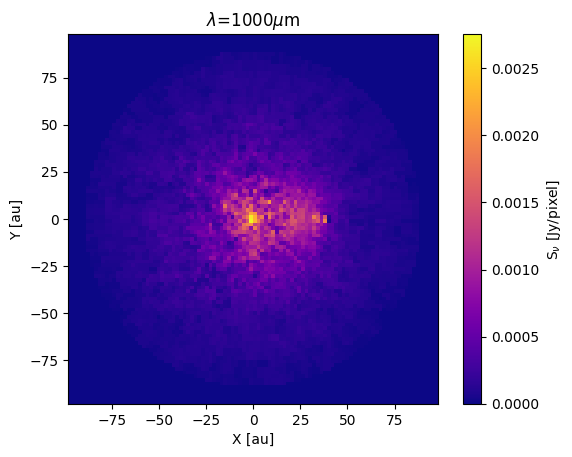

{'implot': <matplotlib.image.AxesImage at 0x15e08c2d280>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x15e08bd9430>}

In [33]:
#sum all relevant pixels in the CPD to get total flux 

# Load image.out with radmc3dpy  readImage() function
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *

# make a set of images with different wavelengths
# makeImage(npix=200,incl=60.,phi=30.,wav=1.3e3,sizeau=200)


im_mm = readImage()
plt.figure()
#plotImage(im_mm,au=True,log=True,maxlog=3,bunit='jy/pixel',dpc=dpc,cmap='plasma')  # for when brightness variation is too large
plotImage(image=im_mm, au = True,maxlog =3, bunit='jy/pixel', dpc =100, cmap = plt.cm.plasma)
#Convert total flux to Jy/beam
#Calculate the noise level for 5 sigma detection in Jy/beam

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load your RADMC-3D image (assuming it's a 2D numpy array)
# Replace with your actual data
image = np.random.rand(100, 100)  # Example: 100x100 pixel image

# Define the pixel scale and ALMA beam size (in arcseconds)
pixel_size = 0.05  # arcsec per pixel (modify based on your image)
theta_maj = 0.5  # ALMA beam major axis (arcsec)
theta_min = 0.4  # ALMA beam minor axis (arcsec)

# Compute beam area and pixel area
omega_beam = (np.pi * theta_maj * theta_min) / (4 * np.log(2))  # Beam solid angle in arcsec^2
omega_pixel = pixel_size**2  # Pixel solid angle in arcsec^2
beam_correction = omega_beam / omega_pixel  # Number of pixels per beam

# Plot the image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower', cmap='inferno', extent=[0, image.shape[1]*pixel_size, 0, image.shape[0]*pixel_size])

# Overlay ALMA beam ellipses
num_beams_x = int(image.shape[1] * pixel_size / theta_maj)  # Estimate how many beams fit in x
num_beams_y = int(image.shape[0] * pixel_size / theta_min)  # Estimate how many beams fit in y

for i in range(0, num_beams_x, 5):  # Spacing out beams
    for j in range(0, num_beams_y, 5):
        beam = Ellipse(xy=(i * theta_maj, j * theta_min),
                       width=theta_maj, height=theta_min,
                       edgecolor='cyan', facecolor='none', linewidth=1.5)
        ax.add_patch(beam)

# Labels
ax.set_xlabel("RA Offset (arcsec)")
ax.set_ylabel("Dec Offset (arcsec)")
ax.set_title("RADMC-3D Image with ALMA Beams Overlaid")
plt.colorbar(label="Flux (Jy/pixel)")

# Show the plot
plt.show()
